In [1]:
import numpy as np
import pandas as pd

In [19]:
habitat_df = pd.read_csv('BMPMammalOnlyKeeperLog.csv')

habitat_df.head()

,Timestamp,Animal,Staff,Log Type,Date,Time,Feeding Log,Did you feed all individuals?,"If not, who did you feed?",What did you feed? (Weight per animal) [<0.1 lb],...,Did you sedate?,Vet Log,Type.2,Vet name,Type.3,Location,Notes.1,Reminders,Reminder Date,Reminder/Note
0,12/1/2024 10:43,Red Fox,Jake,Feeding/Observation,12/1/2024,10:30:00 AM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/1/2024 10:45,Wolf,Jake,Habitat Cleaning/Observation,12/1/2024,10:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/1/2024 10:43,Bobcat,Jake,Feeding/Observation,12/1/2024,9:00:00 AM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/30/2024 16:31,Bobcat,Jake,Feeding/Observation,11/30/2024,4:45:00 PM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/30/2024 16:32,Red Fox,Jake,Feeding/Observation,11/30/2024,4:30:00 PM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
habitat_df.shape

(3633, 70)

In [25]:
habitat_df = habitat_df[habitat_df['Log Type'] == "Habitat Cleaning/Observation"]

In [27]:
habitatLog_cols = ['Timestamp','Animal','Staff','Log Type','Date','Time','Observation Type','Finding', 'Description of cleaning']

cleaninglog = habitat_df[habitatLog_cols]


In [29]:
cleaninglog.shape

(615, 9)

In [31]:
cleaninglog.isna().sum()

Timestamp                  0
Animal                     0
Staff                      0
Log Type                   0
Date                       0
Time                       0
Observation Type           0
Finding                    0
Description of cleaning    0
dtype: int64

In [37]:
cleaninglog['Description of cleaning'].unique()

array(['Water change, Waste removal, Brush removal', 'Water change',
       'Pad cleaning, Water change, Pressure washed walk way',
       'Pad cleaning, Water change, Pressure washed fence',
       'Pad cleaning, Water change',
       'Pad cleaning, Water change, Waste removal, Brush removal',
       'Pad cleaning', 'Filled in holes', 'Waste removal, Brush removal',
       'Water change, Waste removal',
       'Pad cleaning, Water change, Pond cleaning, Waste removal, Brush removal',
       'Water change, Fence maintenance, scooped moldy/fungi stained soil/mulch, blocked lower hide with log and board, filled in hole',
       'Water change, Pond cleaning, Fence maintenance',
       'Water change, Brush removal, Fence maintenance',
       'Pad cleaning, Water change, Brush removal, cleared leaves off walkway and tops of BTS areas',
       'Water change, Watered new grass, dirty dishes removed',
       'Pond cleaning, Waste removal',
       'Pad cleaning, Water change, Waste removal',
  

In [45]:
final_df = cleaninglog.copy()

keywords = {'Pad cleaning', 'Water change', 'Pond cleaning', 'Waste removal', 'Brush removal', 'Fence maintenance'}

# Function to process the column
def split_conditions(description):
    # Split the string into parts
    items = [item.strip() for item in description.split(',')]
    
    # Identify matching and non-matching items
    matched = {kw: kw in items for kw in keywords}
    remaining = ', '.join([item for item in items if item not in keywords])
    
    return pd.Series({**matched, 'Other': remaining if remaining else None})

# Apply the function
final_df = final_df.join(final_df['Description of cleaning'].apply(split_conditions))

# Display the result
print(final_df)

             Timestamp   Animal    Staff                      Log Type  \
1      12/1/2024 10:45     Wolf     Jake  Habitat Cleaning/Observation   
11    11/29/2024 12:10     Wolf     Jake  Habitat Cleaning/Observation   
17    11/28/2024 17:08     Wolf     Jake  Habitat Cleaning/Observation   
18    11/28/2024 17:10   Bobcat     Jake  Habitat Cleaning/Observation   
19    11/28/2024 17:09  Red Fox     Jake  Habitat Cleaning/Observation   
...                ...      ...      ...                           ...   
3469    7/9/2023 14:04     Wolf    Tyler  Habitat Cleaning/Observation   
3479     7/8/2023 9:41   Bobcat    Tyler  Habitat Cleaning/Observation   
3480     7/8/2023 9:34     Deer    Tyler  Habitat Cleaning/Observation   
3485   3/10/2024 11:41     Wolf     John  Habitat Cleaning/Observation   
3488   9/21/2024 11:44     Wolf  Krystal  Habitat Cleaning/Observation   

            Date         Time Observation Type  \
1      12/1/2024  10:00:00 AM              DVE   
11    11/29

## Visualization of Feeding data

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = final_df.copy()

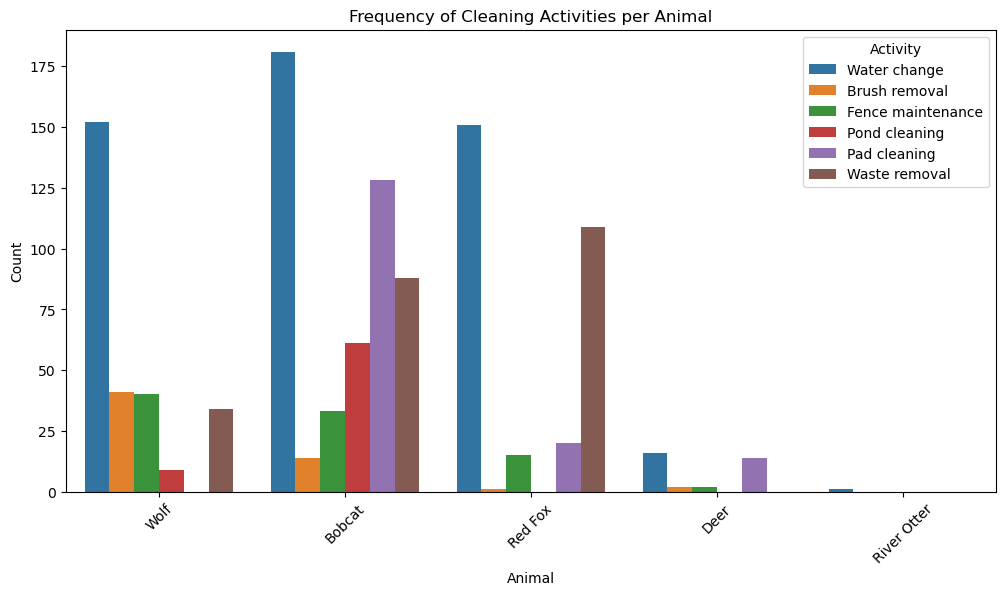

In [56]:
# Convert Date and Time columns to datetime
#df['Date'] = pd.to_datetime(df['Date'])
#df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour  # Extract hour for time analysis

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 1. Bar Chart: Frequency of Cleaning Activities per Animal
activities = ['Water change', 'Brush removal', 'Fence maintenance', 'Pond cleaning', 'Pad cleaning', 'Waste removal']
df_melted = df.melt(id_vars=['Animal'], value_vars=activities, var_name='Activity', value_name='Performed')
df_melted = df_melted[df_melted['Performed'] == True]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, x='Animal', hue='Activity')
plt.title('Frequency of Cleaning Activities per Animal')
plt.xlabel('Animal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Activity')
plt.show()

In [66]:
df['Month_Year'] = df['Timestamp'].dt.to_period('M') 

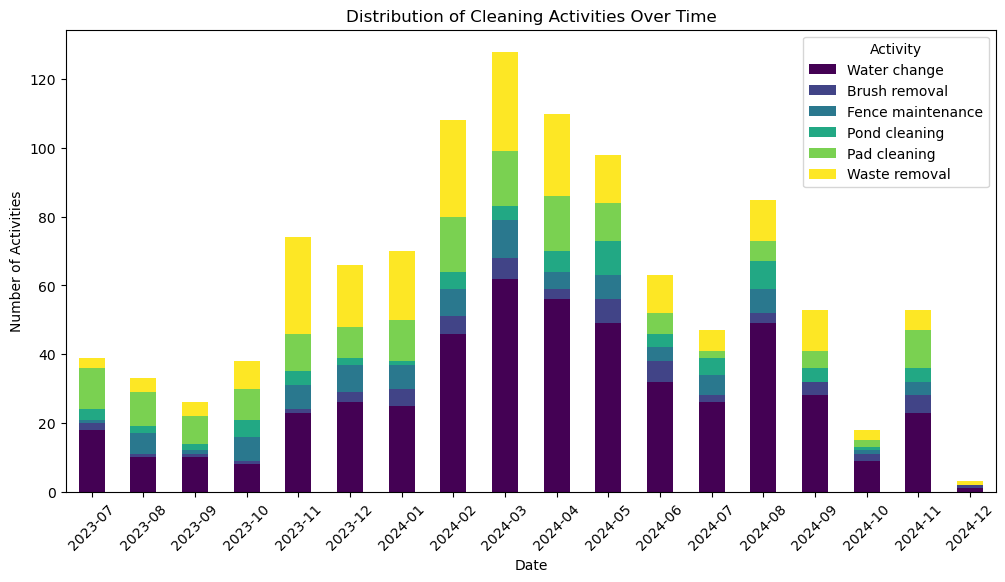

In [68]:
# 2. Stacked Bar Chart: Distribution of Cleaning Activities over Time

activity_counts = df.groupby(['Month_Year'])[activities].sum()
activity_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribution of Cleaning Activities Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.legend(title='Activity')
plt.show()

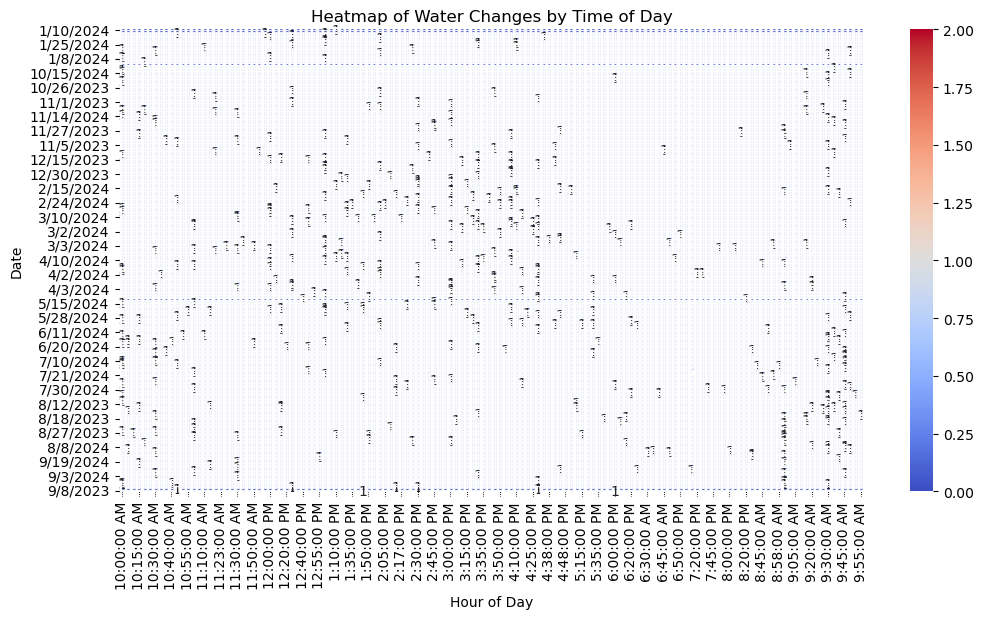

In [72]:
# 3. Heatmap: Cleaning Activities by Time of Day
heatmap_data = df.groupby(['Date', 'Time'])[activities].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='Date', columns='Time', values='Water change').fillna(0)  # Example with Water change

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Heatmap of Water Changes by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.show()

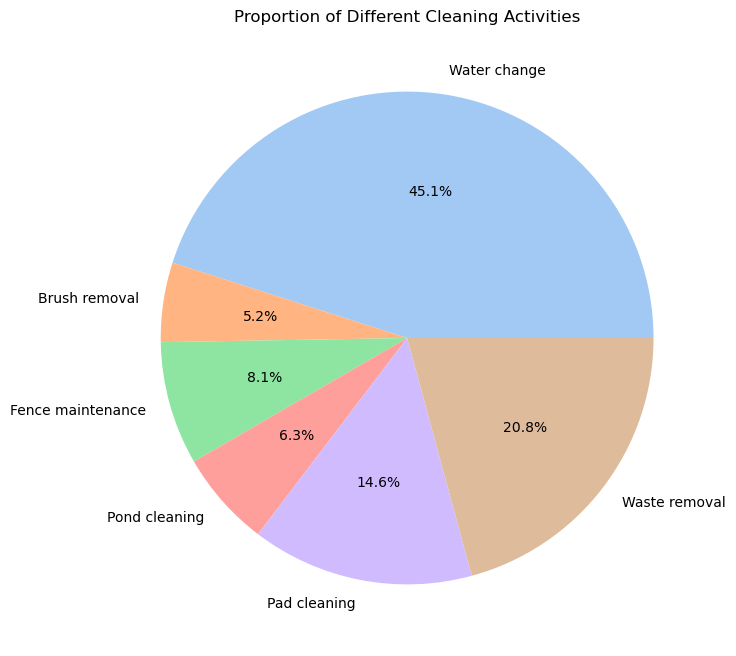

In [62]:
# 4. Pie Chart: Proportion of Different Cleaning Activities
activity_sums = df[activities].sum()
plt.figure(figsize=(8, 8))
plt.pie(activity_sums, labels=activity_sums.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Different Cleaning Activities')
plt.show()